<a href="https://colab.research.google.com/github/TiaErikaDev/ADA-Tecnicas_Programacao-II/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Copa_do_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comentários do Exercício

Em clima de Copa do Mundo, vamos praticar Análise de Dados com o dataset contendo diversas informações sobre todas as partidas da Copa. 

Gere gráficos para tentar responder as seguintes perguntas:

- Quais são os maiores ganhadores da Copa do Mundo?

- Quais são as seleções que mais participaram de edições da Copa do Mundo?

- Quais são as seleções que mais jogaram na Copa do Mundo?

- Quais são as seleções com as maiores quantidades de gols feitos?

- Qual é o retrospecto do Brasil na Copa? (Vitória, Empate e Derrota)

- Quais foram as partidas com a maior quantidade de gols?

- Como a média de espectadores mudou com o passar das edições?

- Quais estádios tiveram a maior quantidade de espectadores?

Além das perguntas já estabelecidas neste exercício, aproveite para também gerar novas análises que o grupo acredite ser pertinente ao problema. :)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/WorldCupMatches.csv')

In [3]:
#Existem dados duplicados (Copa 2014) e vários valores 'vazios'. O melhor a se fazer é remover essas linhas duplicadas.
df[df.duplicated()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
836,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
838,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
839,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
840,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Retiramos duplicatas.
df.drop_duplicates(inplace=True)

#Precisamos também tirar a última linha.
df = df.iloc[:-1,:]

In [5]:
df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL
832,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
833,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
834,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI


In [6]:
#Vamos observar se tudo parece correto.
df['Home Team Name'].unique()
df['Away Team Name'].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Germany FR',
       'Uruguay', 'Wales', 'Northern Ireland', 'Soviet Union', 'Colombia',
       'Bulgaria', 'Korea DPR', 'Portugal', 'Israel', 'Morocco',
       'El Salvador', 'Australia', 'Haiti', 'German DR', 'Zaire',
       'IR Iran', 'Tunisia', 'Iran', 'Cameroon', 'New Zealand', 'Algeria',
       'Honduras', 'Kuwait', 'Iraq', 'Denmark', 'Canada',
       'rn">Republic of Ireland', 'rn">United Arab Emirates',
       'Costa Rica', 'Saudi Arabia', 'Russia', 'Greece', 'Nigeria',
       'South Africa', 'Japan', 'Croatia', 'Jamaica', 'Senegal',
       'Slovenia', 'Ecuador', 'China PR', "C�te d'Ivoire",
       

Temos algumas coisas para mudar aqui.

- Paísas com 'rn'> Parece que foram renomeados posteriormente (como Trinidad and Tobag, Bosnia, etc)

- Alemanha está dividida em algumas formas (Germany FR, Germany DR, Germany). Vamos pelo menos juntar Germany e Germany FR, que mantiveram o histórico de fato dos resultados dac opa.

- O mesmo ocorre para IR Iran e Iran

In [7]:
rn_list = df[df['Home Team Name'].str.contains('>')]['Home Team Name'].unique().tolist()
rn_list_away = df[df['Away Team Name'].str.contains('>')]['Away Team Name'].unique().tolist()

rn_list.extend(rn_list_away)

In [8]:
rn_list

['rn">United Arab Emirates',
 'rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina',
 'rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [9]:
#Pegando os valores da lista não-duplicados
wrong = list(set(rn_list))

right = [n.split('>')[-1] for n in wrong]

In [10]:
#Outros nomes que faremos.
wrong.extend(['Germany FR', 'IR Iran'])

right.extend(['Germany', 'Iran'])

In [11]:
#Dict comprehension
dict_changes = {k:v for k,v in zip(wrong, right)}

In [12]:
dict_changes

{'rn">Bosnia and Herzegovina': 'Bosnia and Herzegovina',
 'rn">Republic of Ireland': 'Republic of Ireland',
 'rn">United Arab Emirates': 'United Arab Emirates',
 'rn">Serbia and Montenegro': 'Serbia and Montenegro',
 'rn">Trinidad and Tobago': 'Trinidad and Tobago',
 'Germany FR': 'Germany',
 'IR Iran': 'Iran'}

In [13]:
df['Home Team Name'].replace(dict_changes,inplace=True)
df['Away Team Name'].replace(dict_changes,inplace=True)

Por fim, vamos ver se tem algo de especial ali no 'Win conditions'

In [14]:
df['Win conditions'].unique()[:20]

array([' ', 'Austria win after extra time ',
       'Italy win after extra time ', 'Brazil win after extra time ',
       'Czechoslovakia win after extra time ',
       'Hungary win after extra time ',
       'Northern Ireland win after extra time ',
       'England win after extra time ',
       'Germany FR win after extra time ',
       'Uruguay win after extra time ', 'Argentina win after extra time ',
       ' win on penalties (5 - 4) ', 'Belgium win after extra time ',
       'France win on penalties (3 - 4) ',
       'Germany FR win on penalties (4 - 1) ',
       'Belgium win on penalties (4 - 5) ',
       'France win after extra time ', 'Cameroon win after extra time ',
       'Republic of Ireland win on penalties (5 - 4) ',
       'Yugoslavia win after extra time '], dtype=object)

In [15]:
df['Win conditions'].unique()[20:]

array([' win on penalties (2 - 3) ', ' win on penalties (3 - 4) ',
       ' win on penalties (4 - 3) ', 'Bulgaria win on penalties (1 - 3) ',
       'Sweden win on penalties (4 - 5) ',
       'Brazil win on penalties (3 - 2) ',
       'Argentina win on penalties (4 - 3) ',
       'Brazil win on penalties (4 - 2) ',
       'Spain win on penalties (3 - 2) ', 'Win on Golden Goal ',
       'Korea Republic win on penalties (3 - 5) ',
       'Ukraine win on penalties (0 - 3) ',
       'Germany win on penalties (4 - 2) ',
       'Portugal win on penalties (1 - 3) ',
       'Italy win on penalties (5 - 3) ', 'Ghana win after extra time ',
       'Paraguay win on penalties (5 - 3) ',
       'Uruguay win on penalties (4 - 2) ', 'Spain win after extra time ',
       'Germany win after extra time ',
       'Argentina win on penalties (2 - 4) ',
       'Netherlands win on penalties (4 - 3) ',
       'Costa Rica win on penalties (5 - 3) '], dtype=object)

- Quais são os maiores ganhadores da Copa do Mundo?

In [16]:
#Vamos criar uma coluna auxiliar para contar os vencedores.
df['Winner'] = np.nan 

In [17]:
def get_winner(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        row['Winner'] = row['Home Team Name']
    elif row['Home Team Goals'] < row['Away Team Goals']:
        row['Winner'] = row['Away Team Name']
    else:
        if (row['Win conditions'] == ' ') or (row['Win conditions'] is None):
            row['Winner'] = 'Tie'
        else:
            row['Winner'] = row['Win conditions'].split(' win')[0]
    return row



df = df.apply(get_winner, axis=1)

In [18]:
#Precisamos adicionar isso manualmente
df[df['Winner'] == '']

#Manualmente adicionando.
new_vals = ['Germany','Argentina','Argentina','Germany']

df.loc[df['Winner'] == '','Winner'] = new_vals


In [19]:
titles = df[df['Stage'] == 'Final']['Winner'].value_counts()

Text(0.5, 1.0, 'Campeões da Copa do Mundo')

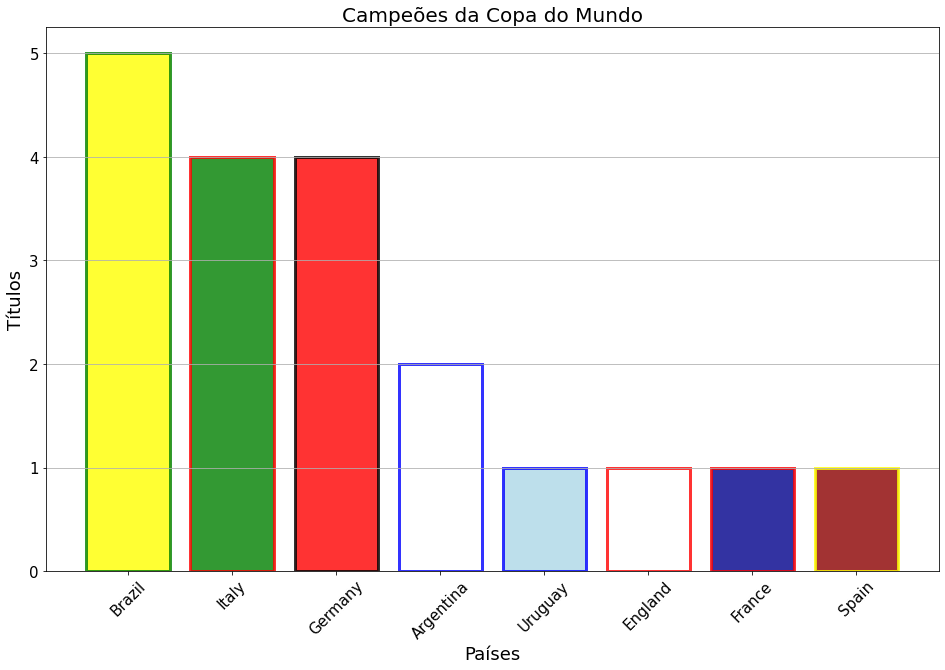

In [20]:
fig = plt.figure(figsize=(16,10))

colors = ['Yellow','Green','Red','White','lightblue','White','darkblue','darkred']

edge_color = ['Green','Red','Black','Blue','Blue','Red','Red','Yellow']

plt.bar(titles.index, titles.values, color=colors, edgecolor=edge_color, alpha=0.8, linewidth=3)
plt.grid(axis='y')
plt.xticks(fontsize=15, rotation = 45);
plt.xlabel('Países',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Títulos',fontsize=18)
plt.title('Campeões da Copa do Mundo',fontsize=20)

- Quais são as seleções que mais participaram de edições da Copa do Mundo?

In [21]:
df_home = df.groupby(['Year', 'Home Team Name']).count()['Home Team Goals'].to_frame()
df_away = df.groupby(['Year', 'Away Team Name']).count()['Away Team Goals'].to_frame()

In [22]:
df_home = df_home.reset_index().rename(columns={'Home Team Name': 'Name', 'Home Team Goals':'Home Matches'}).set_index(['Year','Name'])
df_away = df_away.reset_index().rename(columns={'Away Team Name': 'Name', 'Away Team Goals':'Away Matches'}).set_index(['Year','Name'])

In [23]:
df_away

Away Matches
Year   Name                     
1930.0 Argentina               1
       Belgium                 2
       Bolivia                 2
       Brazil                  1
       Chile                   1
...                          ...
2014.0 Russia                  2
       Spain                   1
       Switzerland             2
       USA                     2
       Uruguay                 2

[409 rows x 1 columns]

In [24]:
df_concat = pd.concat([df_home, df_away], axis='columns')

df_concat.fillna(0,inplace=True)

df_concat['Total Matches'] = df_concat['Home Matches'] + df_concat['Away Matches']

In [25]:
df_concat

Home Matches  Away Matches  Total Matches
Year   Name                                                  
1930.0 Argentina             4.0           1.0            5.0
       Belgium               0.0           2.0            2.0
       Bolivia               0.0           2.0            2.0
       Brazil                1.0           1.0            2.0
       Chile                 2.0           1.0            3.0
...                          ...           ...            ...
2014.0 Russia                1.0           2.0            3.0
       Spain                 2.0           1.0            3.0
       Switzerland           2.0           2.0            4.0
       USA                   2.0           2.0            4.0
       Uruguay               2.0           2.0            4.0

[425 rows x 3 columns]

In [26]:
#Pegando os países com maiores participações.
df_concat.reset_index()['Name'].value_counts()

Brazil                    20
Germany                   18
Italy                     18
Argentina                 16
Mexico                    15
                          ..
Wales                      1
Zaire                      1
Haiti                      1
German DR                  1
Bosnia and Herzegovina     1
Name: Name, Length: 81, dtype: int64

In [27]:
part_teams = df_concat.reset_index()['Name'].value_counts()[:10]

Text(0.5, 1.0, 'Participações em Copa do Mundo')

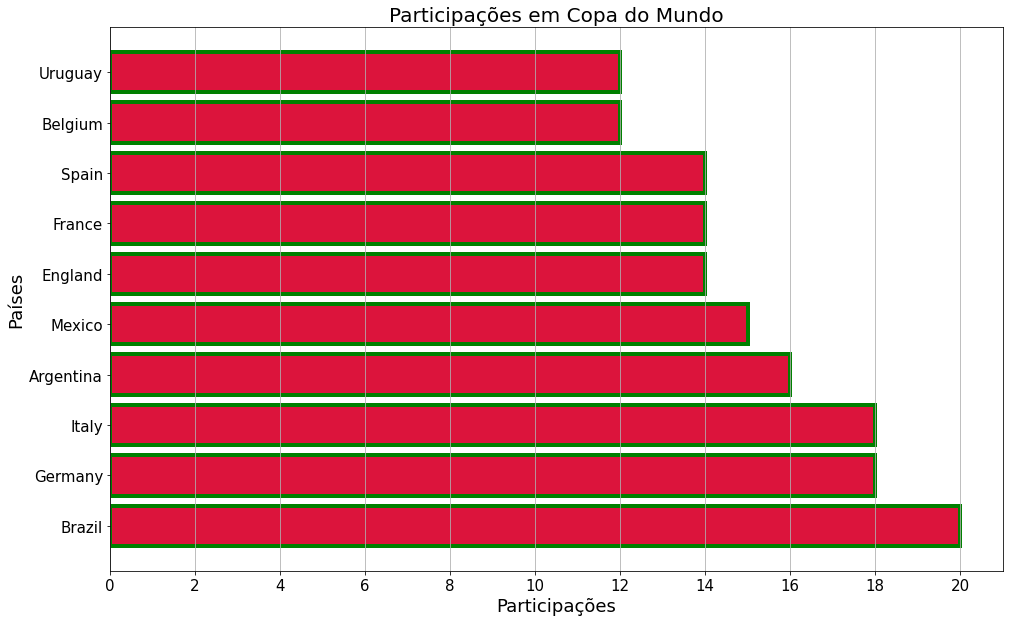

In [28]:
plt.figure(figsize=(16,10))
plt.barh(part_teams.index, part_teams.values, color='crimson', edgecolor='green', linewidth=4)

xticks = np.arange(0, 21, 2)
plt.grid(axis='x')
plt.xticks(xticks, fontsize=15);
plt.xlabel('Participações',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Países',fontsize=18)
plt.title('Participações em Copa do Mundo',fontsize=20)

- Quais são as seleções que mais jogaram na Copa do Mundo?

In [29]:
plays = df_concat.reset_index()

In [30]:
total_plays = plays.groupby('Name').agg({'Total Matches': 'sum'}).sort_values(by='Total Matches', ascending=False)

In [31]:
top_10 = total_plays.iloc[:10,:]

Text(0.5, 1.0, 'Participações em Copa do Mundo')

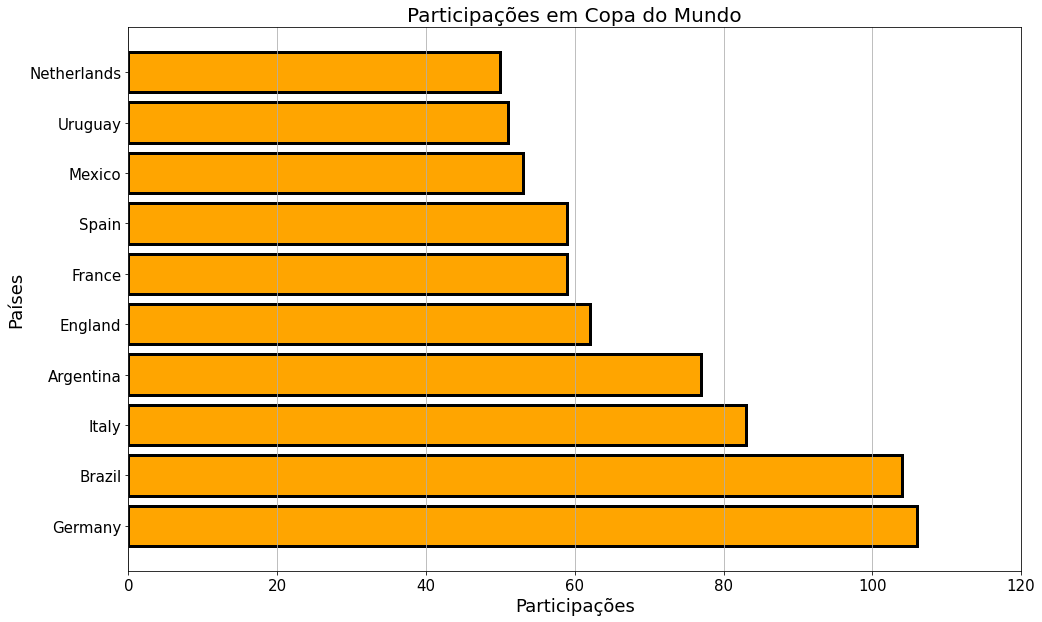

In [32]:
plt.figure(figsize=(16,10))
plt.barh(top_10.index, top_10['Total Matches'], color='orange', edgecolor='black', linewidth=3)

xticks = np.arange(0, 121, 20)
plt.grid(axis='x')
plt.xticks(xticks, fontsize=15);
plt.xlabel('Participações',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Países',fontsize=18)
plt.title('Participações em Copa do Mundo',fontsize=20)

- Quais são as seleções com as maiores quantidades de gols feitos?

In [33]:
home_goals = df.groupby(['Year', 'Home Team Name']).agg({'Home Team Goals':'sum'})
away_goals = df.groupby(['Year', 'Away Team Name']).agg({'Away Team Goals':'sum'})

In [34]:
home_goals = home_goals.reset_index().rename(columns={'Home Team Name': 'Name'}).set_index(['Year','Name'])
away_goals = away_goals.reset_index().rename(columns={'Away Team Name': 'Name'}).set_index(['Year','Name'])

total_goals = pd.concat([home_goals, away_goals], axis='columns')

total_goals.fillna(0,inplace=True)

total_goals['Total Goals'] = total_goals['Home Team Goals'] + total_goals['Away Team Goals']

In [35]:
goals = total_goals.reset_index()
team_goals = goals.groupby('Name').agg({'Total Goals':'sum'}).sort_values(by='Total Goals',ascending=False)

In [36]:
team_goals

,Total Goals
Name,
Germany,224.0
Brazil,221.0
Argentina,131.0
Italy,128.0
France,106.0
...,...
Trinidad and Tobago,0.0
China PR,0.0
Canada,0.0


In [37]:
top_10_scores = team_goals.iloc[:10,:]

Text(0.5, 1.0, 'Participações em Copa do Mundo')

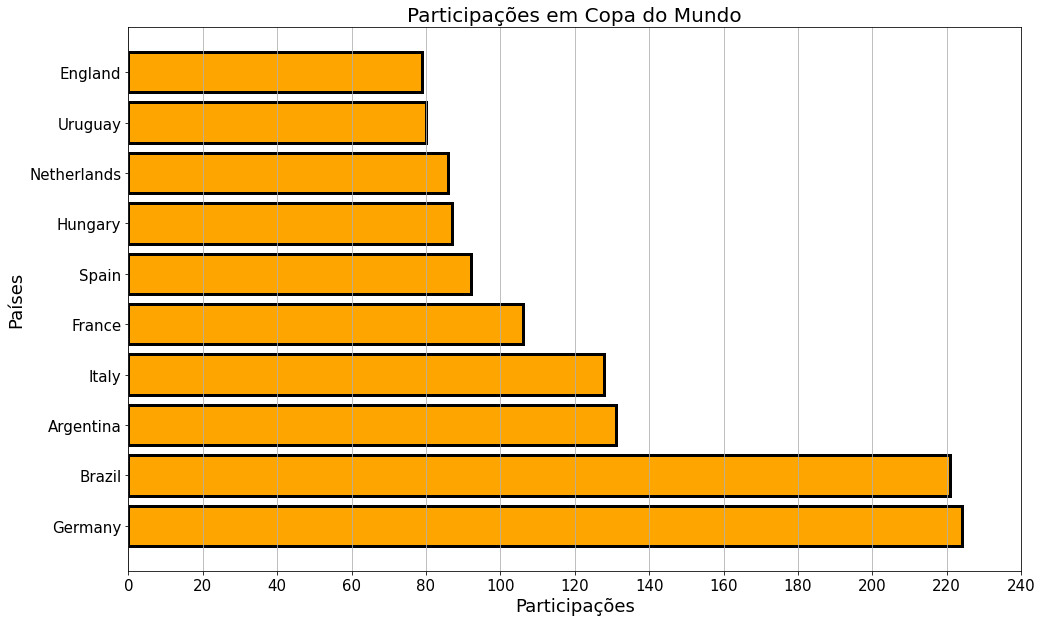

In [38]:
plt.figure(figsize=(16,10))
plt.barh(top_10_scores.index, top_10_scores['Total Goals'], color='orange', edgecolor='black', linewidth=3)

xticks = np.arange(0, 250, 20)
plt.grid(axis='x')
plt.xticks(xticks, fontsize=15);
plt.xlabel('Participações',fontsize=18)
plt.yticks(fontsize=15);
plt.ylabel('Países',fontsize=18)
plt.title('Participações em Copa do Mundo',fontsize=20)

- Qual é o retrospecto do Brasil na Copa? (Vitória, Empate e Derrota)

In [39]:
df_brazil = df[(df['Home Team Name'] == 'Brazil') | (df['Away Team Name'] == 'Brazil')]

In [40]:
df_brazil.loc[df_brazil['Winner'] == 'Brazil','Winner'] = 'Win'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [41]:
df_brazil.loc[~df_brazil['Winner'].isin(['Win','Tie']),'Winner'] = 'Lose'

In [42]:
recap = df_brazil['Winner'].value_counts()

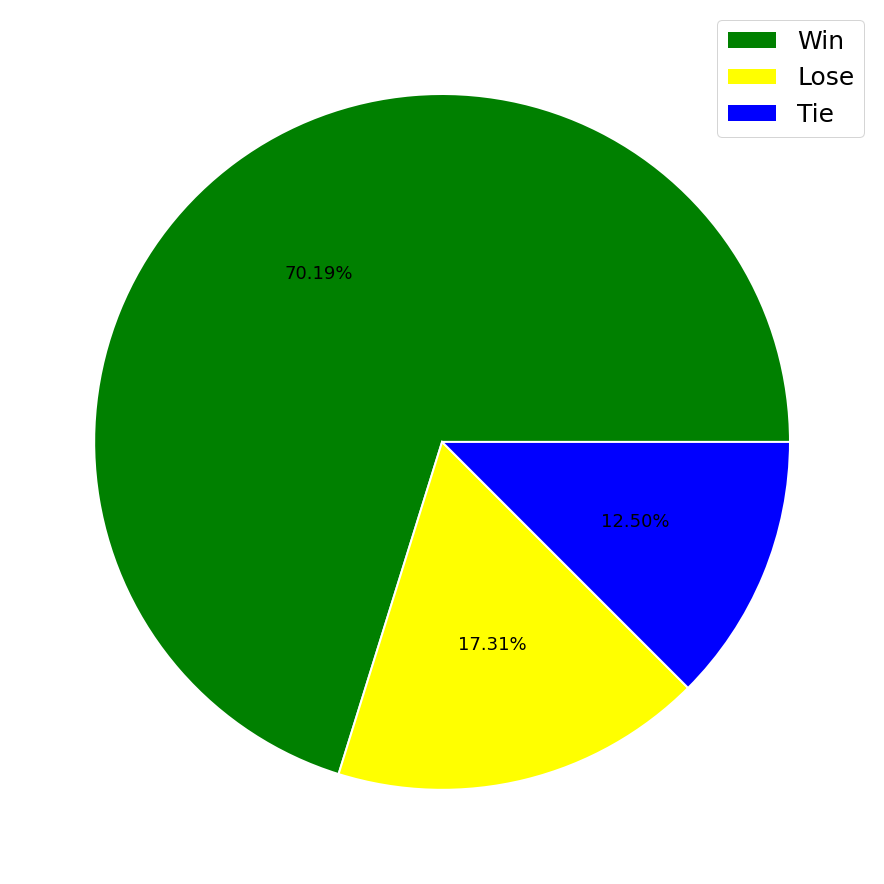

In [43]:
plt.figure(figsize=(16,16))
colors = ['green','yellow','blue']

wedgeprops={"edgecolor":"white",'linewidth': 2, 'antialiased': True}


plt.pie(recap.values, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops,textprops={'fontsize': 18, 'color':'black'});

plt.legend(recap.index, prop={'size':25})

- Quais foram as partidas com a maior quantidade de gols?

- Como a média de espectadores mudou com o passar das edições?

- Quais estádios tiveram a maior quantidade de espectadores?

In [44]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Winner'],
      dtype='object')

In [45]:
espect = df.groupby('Year').agg({'Attendance':'sum'})

In [46]:
espect

,Attendance
Year,
1930.0,590549.0
1934.0,363000.0
1938.0,375700.0
1950.0,1045246.0
1954.0,768607.0
1958.0,819810.0
1962.0,893172.0
1966.0,1563135.0
1970.0,1603975.0


In [47]:
espect.loc[1942,'Attendance'] = 0
espect.loc[1946,'Attendance'] = 0

In [48]:
espect = espect.sort_index()

In [49]:
list_hosts = ['Uruguay','Italy','NA','NA','France','Brazil','Switzerland','Sweden','Chile','England','Mexico','Germany','Argentina','Spain','Mexico','Italy','United States','France','Japan/Korea','Germany','South Africa','Brazil']

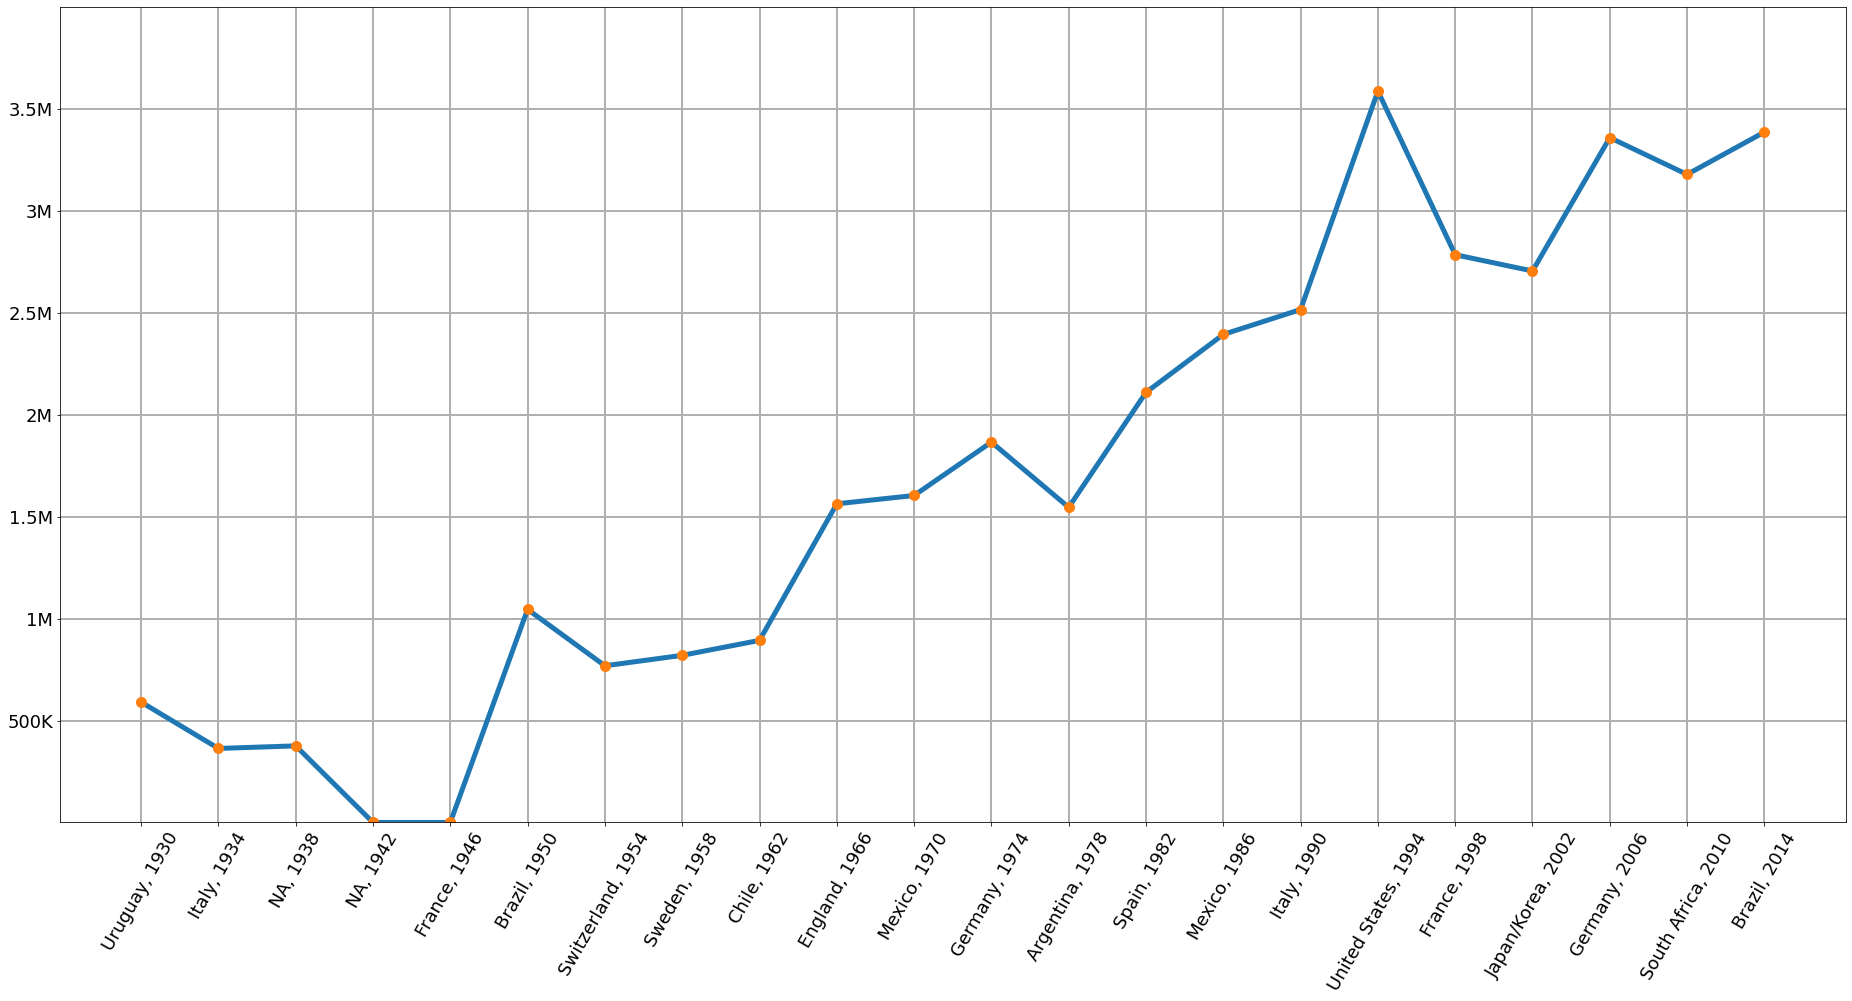

In [50]:
plt.figure(figsize=(32,15))
plt.plot(espect.index, espect['Attendance'], linewidth=5)
plt.plot(espect.index, espect['Attendance'], 'o', markersize=10)

yvals = np.arange(500000, 4000000, 500000)
plt.yticks(yvals, ['500K','1M', '1.5M', '2M', '2.5M', '3M', '3.5M'], fontsize=18);
xvals = np.arange(1930, 2018, 4)

xalias = [hosts + ', ' + str(edition) for hosts,edition in zip(list_hosts, xvals)]

plt.xticks(xvals, xalias, rotation=60, fontsize=18);
plt.grid(linewidth=2)
plt.ylim([0,4000000]);
